<a href="https://colab.research.google.com/github/Rosalesmariana/Simulacion-I-/blob/main/Aguja_de_Buffon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experimento de la aguja de Buffon**

El método de la aguja de Buffon para estimar $\pi$ es un problema clásico de probabilidad geométrica que utiliza el lanzamiento de una aguja sobre un plano con líneas paralelas

**Solucion analitica **

*Planteamiento del problema*

El objetivo es calcular la probabilidad de que la aguja cruce una de las líneas.

Aguja: Una aguja de longitud L se lanza aleatoriamente sobre un plano

Líneas paralelas: El plano tiene líneas paralelas separadas por una distancia D

*Parámetros y Variables*

$L$ : Longitud de la aguja

$D$ : Distancia entre las líneas paralelas

$θ$ : Ángulo que forma la aguja con las líneas paralelas, que varía uniformemente entre $0$ y $\pi$

$d$ : Distancia desde el centro de la aguja hasta la línea más cercana, que varía uniformemente entre $0$ y $\frac{D}{2}$

*Condición para Cruzar una Línea*

La aguja cruzará una línea si la proyección de la mitad de la aguja en la dirección perpendicular a las líneas es mayor que la distancia $d$

Lo cual queda expresado como

$\frac{L}{2} sen (θ) ≥ d$

*Probabilidad de Cruzar una Línea*

Para encontrar la probabilidad de que la aguja cruce una línea, necesitamos considerar todas las posibles posiciones y ángulos de la aguja.
La probabilidad $P$ de que la aguja cruce una línea se puede calcular integrando sobre estos rangos

La probabilidad de que la aguja cruce una línea se calcula como:

$P=\frac{A_{cruce}}{A_{total}}$

El área total es simplemente el producto de los rangos de $θ$ y $d$

$A_{total}= \frac{\pi}{2} \frac{D}{2}$

Para calcular el área donde la aguja cruza una línea, integramos la condición $\frac{L}{2} sen (θ) ≥ d$

$A_{cruce}=  \int_{0}^{\frac{\pi}{2}}  \int_{0}^{\frac{L}{2} sen (θ)} d dθ = \int_{0}^{\frac{\pi}{2}} \frac{L}{2} sin \theta d θ $

Resolviendo la integral tenemos

$\int_{0}^{\frac{\pi}{2}} \frac{L}{2} sin \theta d θ = \frac{L}{2} [-cos \theta ]  \Big|_0^\frac{\pi}{2} = \frac{L}{2}(-cos(\frac{\pi}{2}) + cos(0)) = \frac{L}{2}$

Entonces la probabilidad es

$P=\frac{A_{cruce}}{A_{total}}$

$P= \frac{\frac{L}{2}}{\frac{\pi}{2} \frac{D}{2}}= \frac{L}{2}  \frac{2}{\pi}  \frac{2}{D}= \frac{2L}{\pi D}$

Usando la probabilidad $P$ obtenida, podemos reordenar la fórmula para estimar $\pi$

$P=\frac{2L}{\pi D} ⇒ \pi = \frac{2L}{PD}$

En el experimento, si lanzamos la aguja $N$ veces y contamos el número de cruces $N_{cruces}$, la probabilidad $P$ se puede estimar como:

$P ≈ \frac{N_c}{N}$

Sustituyendo esto en la fórmula para $\pi$

$\pi ≈ \frac{2L * N}{D * N_c}$

**Solucion por simulación**


Vamos a iniciar por importar las librerias necesarias


In [41]:
import random
import math
import matplotlib.pyplot as plt

Asignamos los parametros del experimento

In [92]:
L = 1.0  # Longitud de la aguja
D = 1.0  # Distancia entre líneas
N = 5000  # Número de lanzamientos

Utilizaremos un contador para el total de veces que la aguja logra cruzar una de las lineas, asi como una lista

In [93]:

cruces = 0 # Contador de cruces
pi_estimates = []  # Lista para almacenar las estimaciones de pi

Para la simulacion del experimento utilizaremos un bucle y una condicional

Para cada lanzamiento, se generan aleatoriamente la posición
$d$ del centro de la aguja y el ángulo $𝜃$

Se verifica si la aguja cruza una línea y se incrementa el contador si lo hace.
La estimación de $\pi$ se calcula solo si el contador es mayor que $0$ para evitar división por cero al inicio.

In [94]:
# Simulación del experimento
for i in range(1, N + 1):
    # Posición del centro de la aguja
    d = random.uniform(0, D / 2)
    # Ángulo de la aguja
    theta = random.uniform(0, math.pi / 2)
    # Verificar si la aguja cruza una línea
    if d <= (L / 2) * math.sin(theta):
        cruces += 1

    # Estimación de pi
    if cruces > 0:
        pi_estimate = (2 * L * i) / (D * cruces)
        pi_estimates.append(pi_estimate)
    else:
        pi_estimates.append(0)  # Evitar división por cero al inicio

print(pi_estimate)

3.1259768677711786


Finalmente mostramos el grafico que nos permitirá observar cómo la estimación de $\pi$ se estabiliza a medida que el número de lanzamientos aumenta, mostrando claramente tanto el estado transitorio como el estado estable de la estimación.

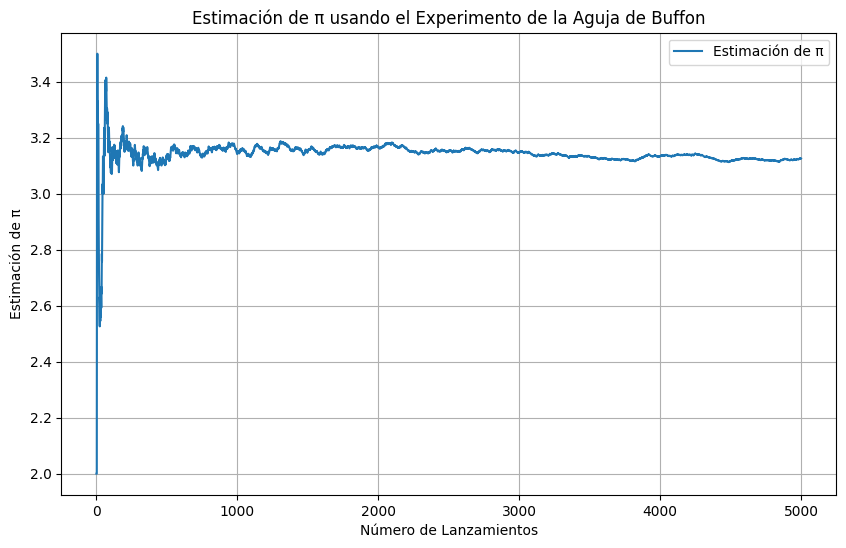

In [95]:
# Gráfico de la estimación de pi
plt.figure(figsize=(10, 6))
plt.plot(range(1, N + 1), pi_estimates, label='Estimación de π')
plt.xlabel('Número de Lanzamientos')
plt.ylabel('Estimación de π')
plt.title('Estimación de π usando el Experimento de la Aguja de Buffon')
plt.legend()
plt.grid(True)
plt.show()
